In [24]:
import hddm
import pandas as pd
import matplotlib.pyplot as plt
import os
path = '/Users/Krista/Documents/github_repositories/testing-master/'

In [25]:
os.chdir(path)
os.getcwd()

'/Users/Krista/Documents/github_repositories/testing-master'

In [26]:
data = hddm.load_csv('./400t.csv')
data.columns = data.columns.str.strip()
data.head(4)
data.tail()

,rt,response,gen_drift,gen_bound,subj_idx,cond
79995,0.182,1,1.00000,0.803493,49,hv
79996,0.182,0,1.00000,0.646792,49,hv
79997,0.182,0,1.00000,1.529738,49,hv
79998,0.182,0,1.00000,0.662285,49,hv
79999,0.262,0,0.75586,0.613484,49,hv


In [27]:
data[data.cond == "lc"].gen_drift.mean(), data[data.cond == "hc"].gen_drift.mean()

(0.88762697441978966, 0.83465624556577189)

In [41]:
data[data.cond == "lv"].gen_drift.mean(), data[data.cond == "hv"].gen_drift.mean()

(0.88139209546572383, 0.82109704576491238)

In [42]:
data[data.cond == "lc"].gen_bound.mean(), data[data.cond == "hc"].gen_bound.mean()

(0.70209009226686669, 0.74454996003048446)

In [28]:
data[data.cond == "lv"].gen_bound.mean(), data[data.cond == "hv"].gen_bound.mean()

(0.67272106615709237, 0.8664277059184462)

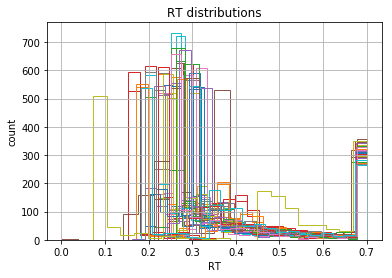

In [29]:
fig = plt.figure()
ax = fig.add_subplot(111, xlabel='RT', ylabel='count', title='RT distributions')
for i, subj_data in data.groupby('subj_idx'):
    subj_data.rt.hist(bins=20, histtype='step', ax=ax)


In [30]:
comb_stim = hddm.HDDM(data, bias=False, depends_on={'v':'cond', 'a':'cond'},
                        include=['v'], p_outlier=0.05)
comb_stim.find_starting_values()
comb_stim.sample(1000, burn=20)

/Users/Krista/anaconda/envs/hddm/lib/python3.5/site-packages/scipy/optimize/optimize.py:1927: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
/Users/Krista/anaconda/envs/hddm/lib/python3.5/site-packages/scipy/optimize/optimize.py:1932: RuntimeWarning: invalid value encountered in absolute
  tmp2 = numpy.abs(tmp2)
/Users/Krista/anaconda/envs/hddm/lib/python3.5/site-packages/pymc/Node.py:403: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  self.__name__ = input['__name__']


 [-----------------100%-----------------] 1001 of 1000 complete in 638.5 sec

/Users/Krista/anaconda/envs/hddm/lib/python3.5/site-packages/numpy/core/fromnumeric.py:1156: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  a = a[:-extra]
/Users/Krista/anaconda/envs/hddm/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)


In [31]:
drift_stim = hddm.HDDM(data, bias=False, depends_on={'v':'cond'},
                        include=['v'], p_outlier=0.05)
drift_stim.find_starting_values()
drift_stim.sample(1000, burn=20)

/Users/Krista/anaconda/envs/hddm/lib/python3.5/site-packages/scipy/optimize/optimize.py:1927: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
/Users/Krista/anaconda/envs/hddm/lib/python3.5/site-packages/scipy/optimize/optimize.py:1932: RuntimeWarning: invalid value encountered in absolute
  tmp2 = numpy.abs(tmp2)
/Users/Krista/anaconda/envs/hddm/lib/python3.5/site-packages/pymc/Node.py:403: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  self.__name__ = input['__name__']


 [-----------------100%-----------------] 1000 of 1000 complete in 582.5 sec

/Users/Krista/anaconda/envs/hddm/lib/python3.5/site-packages/numpy/core/fromnumeric.py:1156: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  a = a[:-extra]
/Users/Krista/anaconda/envs/hddm/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)


In [32]:
bound_stim = hddm.HDDM(data, bias=False, depends_on={'a':'cond'},
                        include=['a'], p_outlier=0.05)
bound_stim.find_starting_values()
bound_stim.sample(1000, burn=20)

/Users/Krista/anaconda/envs/hddm/lib/python3.5/site-packages/scipy/optimize/optimize.py:1927: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
/Users/Krista/anaconda/envs/hddm/lib/python3.5/site-packages/scipy/optimize/optimize.py:1932: RuntimeWarning: invalid value encountered in absolute
  tmp2 = numpy.abs(tmp2)
/Users/Krista/anaconda/envs/hddm/lib/python3.5/site-packages/pymc/Node.py:403: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  self.__name__ = input['__name__']


 [-----------------100%-----------------] 1001 of 1000 complete in 492.2 sec

/Users/Krista/anaconda/envs/hddm/lib/python3.5/site-packages/numpy/core/fromnumeric.py:1156: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  a = a[:-extra]
/Users/Krista/anaconda/envs/hddm/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)


In [19]:
stats = drift_stim.gen_stats()
stats[stats.index.isin(['v(hc)','v(lc)', 'v(hv)','v(lv)'])]

/Users/Krista/anaconda/envs/hddm/lib/python3.5/site-packages/numpy/core/fromnumeric.py:1156: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  a = a[:-extra]
/Users/Krista/anaconda/envs/hddm/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)


,mean,std,2.5q,25q,50q,75q,97.5q,mc err
v(hc),-0.00496334,0.0223842,-0.0484345,-0.0199624,-0.00510236,0.00877499,0.0400167,0.00135454
v(hv),-0.0288559,0.021728,-0.0721531,-0.0436311,-0.0296081,-0.0141166,0.0138864,0.00147967
v(lc),0.266446,0.022649,0.222203,0.251452,0.265959,0.281656,0.312704,0.00147652
v(lv),0.216364,0.0244983,0.168172,0.199843,0.215317,0.232941,0.268121,0.00164359


In [20]:
stats = bound_stim.gen_stats()
stats[stats.index.isin(['a(hc)','a(lc)', 'a(hv)','a(lv)'])]

/Users/Krista/anaconda/envs/hddm/lib/python3.5/site-packages/numpy/core/fromnumeric.py:1156: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  a = a[:-extra]
/Users/Krista/anaconda/envs/hddm/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)


,mean,std,2.5q,25q,50q,75q,97.5q,mc err
a(hc),0.71919,0.0213846,0.676272,0.704646,0.719364,0.733762,0.761831,0.000686193
a(hv),0.81821,0.0220354,0.774215,0.802583,0.818971,0.83364,0.85897,0.000779722
a(lc),0.750488,0.0222041,0.704216,0.7366,0.750665,0.765333,0.793992,0.000841832
a(lv),0.682095,0.0216516,0.639739,0.667764,0.683537,0.696471,0.724305,0.000769857


Plotting v(hc)
Plotting v(hv)
Plotting v(lc)
Plotting v(lv)


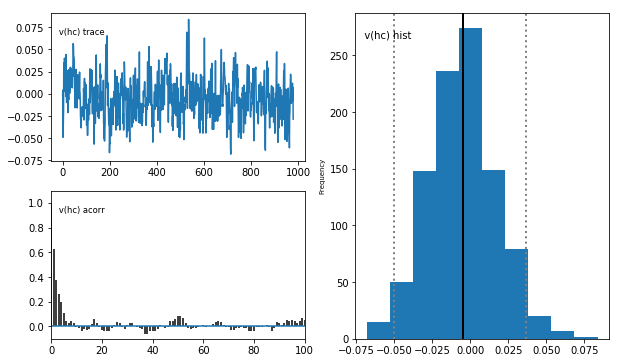

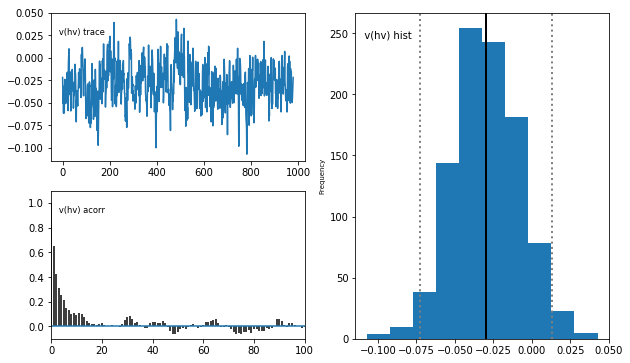

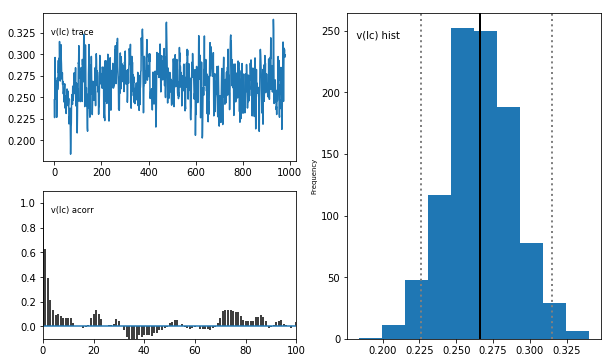

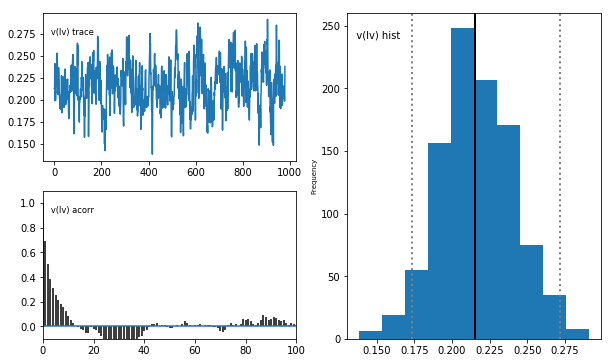

In [21]:
drift_stim.plot_posteriors('v')

In [34]:
v_lc, v_hc = drift_stim.nodes_db.node[['v(lc)', 'v(hc)']]
v_lv, v_hv = drift_stim.nodes_db.node[['v(lv)', 'v(hv)']]
a_lv, a_hv = bound_stim.nodes_db.node[['a(lv)', 'a(hv)']]
a_lc, a_hc = bound_stim.nodes_db.node[['a(lc)', 'a(hc)']]

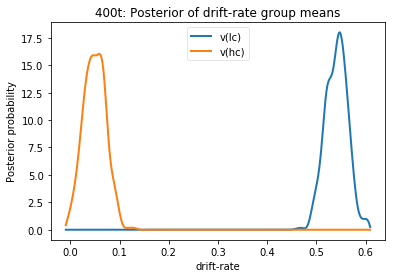

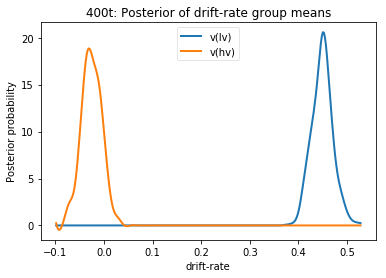

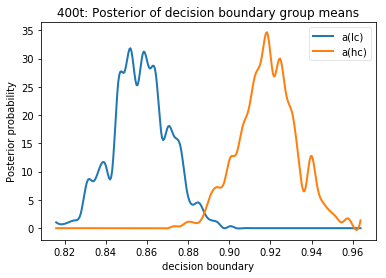

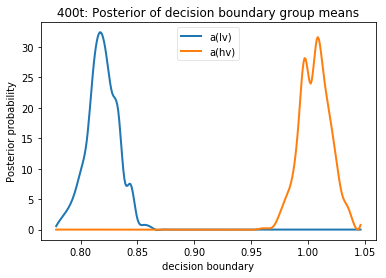

In [35]:
hddm.analyze.plot_posterior_nodes([v_lc, v_hc])
plt.xlabel('drift-rate')
plt.ylabel('Posterior probability')
plt.title('400t: Posterior of drift-rate group means')
plt.savefig('400t_drift_conflict.pdf')

hddm.analyze.plot_posterior_nodes([v_lv, v_hv])
plt.xlabel('drift-rate')
plt.ylabel('Posterior probability')
plt.title('400t: Posterior of drift-rate group means')
plt.savefig('400t_drift_vol.pdf')

hddm.analyze.plot_posterior_nodes([a_lc, a_hc])
plt.xlabel('decision boundary')
plt.ylabel('Posterior probability')
plt.title('400t: Posterior of decision boundary group means')
plt.savefig('400t_bound_conflict.pdf')


hddm.analyze.plot_posterior_nodes([a_lv, a_hv])
plt.xlabel('decision boundary')
plt.ylabel('Posterior probability')
plt.title('400t: Posterior of decision boundary group means')
plt.savefig('400t_bound_vol.pdf')


In [ ]:
# print("P(low_conflict_drift > high_conflict_drift) = ", (v_hc.trace() > v_lc.trace()).mean())
# print("P(low_conflict_bound > high_conflict_bound) = ", (a_hc.trace() > a_lc.trace()).mean())
# print("P(high_volatility_bound > low_volatility_bound) = ", (a_hv.trace() > a_lv.trace()).mean())
# print("P(high_volatility_drift > low_volatility_drift) = ", (v_hv.trace() > v_lv.trace()).mean())

In [ ]:
#for when i fit a null model 
# print "Lumped model DIC: %f" % model.dic
# print("Stimulus model DIC: %f" % m_stim.dic)

In [ ]:
#model does not save... db is 'ram' error
# m_stim.save('1000t')

combined model DIC: 11511.523758
drift model DIC: 15150.640261
bound model DIC: 12400.356002


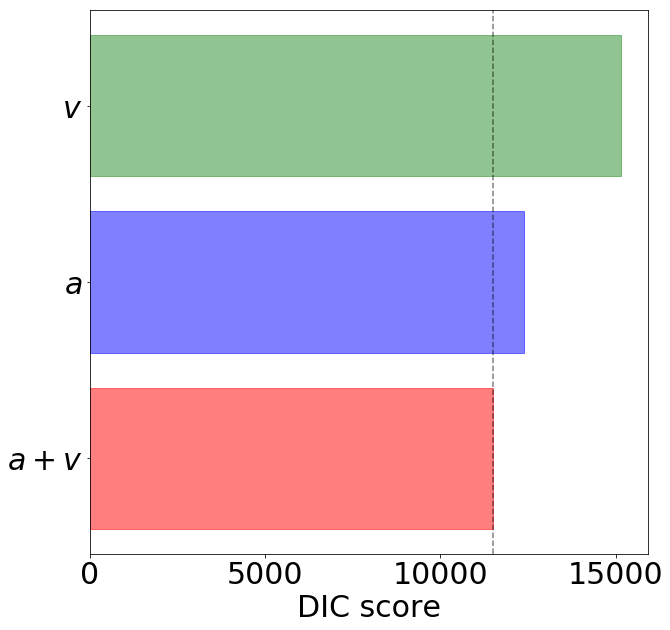

In [38]:
#for when i fit alternative models

fig_path = '/Users/Krista/Dropbox/volatileValues/m_plots/'

print("combined model DIC: %f" % comb_stim.dic)
print("drift model DIC: %f" % drift_stim.dic)
print("bound model DIC: %f" % bound_stim.dic)

plt.rcParams['figure.figsize'] = 10, 10
plt.rcParams['axes.titlesize'] = 25
plt.rcParams['axes.labelsize'] = 30
plt.rcParams['xtick.labelsize'] = 30
plt.rcParams['ytick.labelsize'] = 30

names = [r'$a + v$',r'$a$',r'$v$']
dics = [comb_stim.dic,  bound_stim.dic, drift_stim.dic]
bars = plt.barh(names,dics, alpha=0.5)
plt.xlabel('DIC score')

bars[0].set_color('r')
bars[1].set_color('blue')
bars[2].set_color('forestgreen')

plt.axvline(comb_stim.dic, color='k', alpha=0.5, linestyle = '--')
plt.savefig(fig_path+'400t_DIC.pdf')

In [40]:
import numpy as np
dics = np.hstack(np.matrix((comb_stim.dic,  bound_stim.dic,  drift_stim.dic)))
# np.diff(dics)
header = ('combined_dic, a_dic, v_dic')
np.savetxt('400t_DICs.csv', dics, header = header, delimiter=',', comments='')

In [39]:
 comb_stim.print_stats('./400t_comb_stats.csv')
 drift_stim.print_stats('./400t_drift_stats.csv')
 bound_stim.print_stats('./400t_bound_stats.csv')

/Users/Krista/anaconda/envs/hddm/lib/python3.5/site-packages/numpy/core/fromnumeric.py:1156: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  a = a[:-extra]
/Users/Krista/anaconda/envs/hddm/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)


In [44]:
np.diff(dics)

matrix([[  888.83224456,  2750.28425826]])